# EN3160 - Assignment 1
## Question - 1
### Part (a) & Part (b)

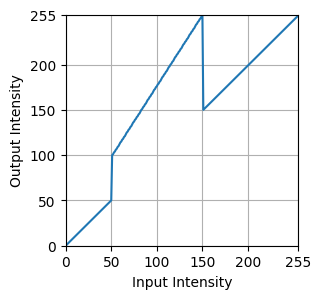

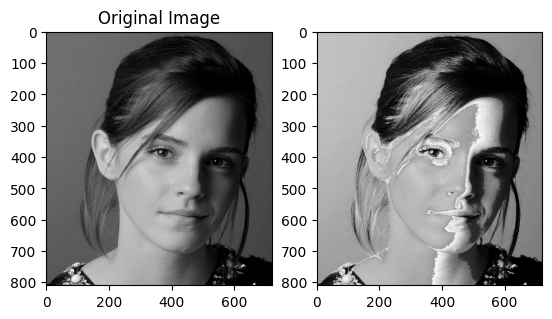

In [5]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0,50,51).astype('uint8')
t2= np.linspace(100,255,100).astype('uint8')
t3 = np.linspace(150,255,105).astype('uint8')

transform = np.concatenate((t1, t2), axis = 0)
transform = np.concatenate((transform, t3), axis = 0)

num_axis = [0, 50, 100, 150, 200, 255]

plt.figure(figsize=(3,3))
plt.plot(transform)
plt.grid()
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.xlim(0,255)
plt.ylim(0,255)
plt.xticks(num_axis)
plt.yticks(num_axis)


img = cv.imread('D:/VScode/JupyterWorks/emma.jpg', cv.IMREAD_GRAYSCALE)
#img = cv.imread(r'D:\VScode\JupyterWorks\Assignment 1\emma.jpg', cv.IMREAD_GRAYSCALE)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
transform_img = cv.LUT(img, transform)

fig, ax = plt.subplots(1,2)
ax[0].set_title('Original Image')
ax[0].imshow(img)
ax[1].set_title('')
ax[1].imshow(transform_img)
plt.show()

## Question - 2
### Part (a) & Part (b)

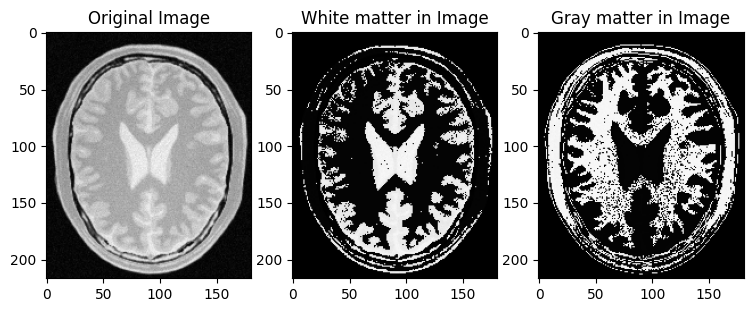

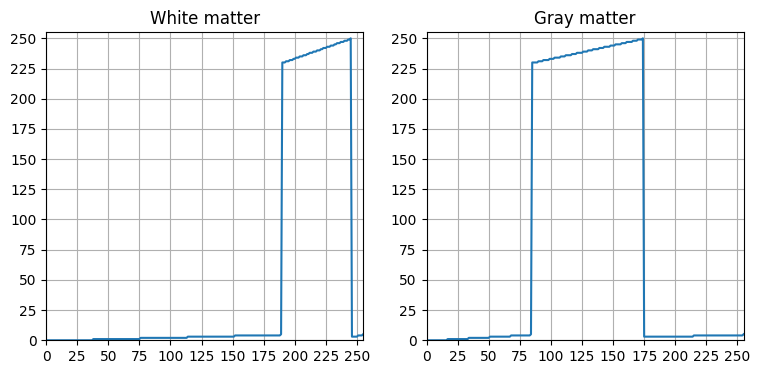

In [7]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0, 5, 190).astype('uint8')
t2 = np.linspace(230, 250, 56).astype('uint8')
t3 = np.linspace(3, 5, 10).astype('uint8')

v1 = np.linspace(0, 5, 85).astype('uint8')
v2 = np.linspace(230, 250, 90).astype('uint8')
v3 = np.linspace(3, 5, 81).astype('uint8')

transform1 = np.concatenate((t1, t2), axis = 0)
transform1 = np.concatenate((transform1, t3), axis = 0)

transform2 = np.concatenate((v1, v2), axis = 0)
transform2 = np.concatenate((transform2, v3), axis = 0)

img = cv.imread(r'D:\VScode\JupyterWorks\BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img1 = cv.LUT(img, transform1)
img2 = cv.LUT(img, transform2)

fig, ax = plt.subplots(1,3, figsize = (9,9))
ax[0].set_title('Original Image')
ax[0].imshow(img)
ax[1].set_title('White matter in Image')
ax[1].imshow(img1)
ax[2].set_title('Gray matter in Image')
ax[2].imshow(img2)

num_axis = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
fig, ax1 = plt.subplots(1,2, figsize = (9,4))


ax1[0].set_title('White matter')
ax1[0].plot(transform1)
ax1[0].set_xlim([0,255])
ax1[0].set_ylim([0,255])
ax1[0].grid()
ax1[0].set_xticks(num_axis)
ax1[0].set_yticks(num_axis)

ax1[1].set_title('Gray matter')
ax1[1].plot(transform2)
ax1[1].set_xlim([0,255])
ax1[1].set_ylim([0,255])
ax1[1].grid()
ax1[1].set_xticks(num_axis)
ax1[1].set_yticks(num_axis)
plt.show()

## Question - 3
### Part (a) & Part (b)

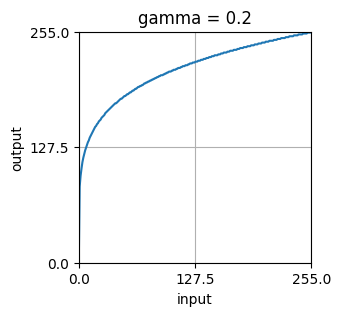

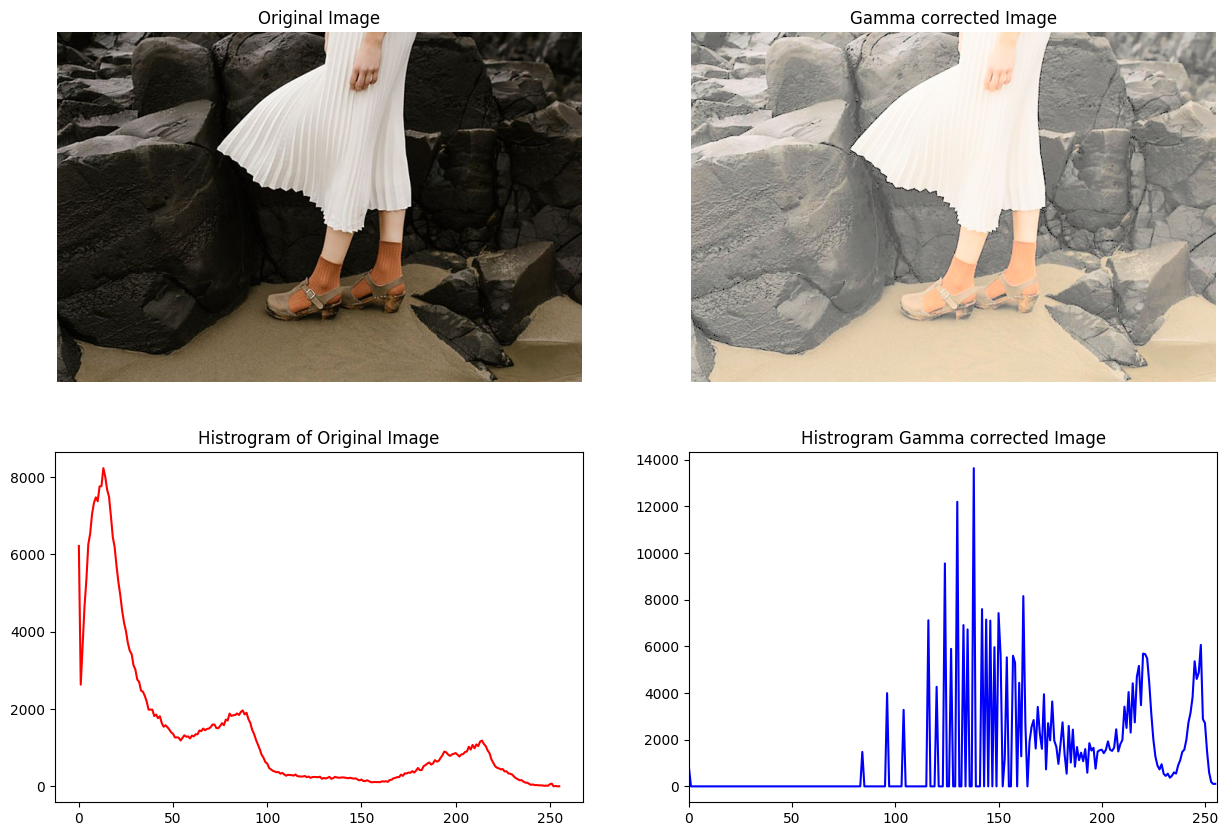

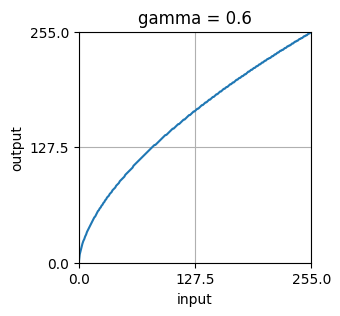

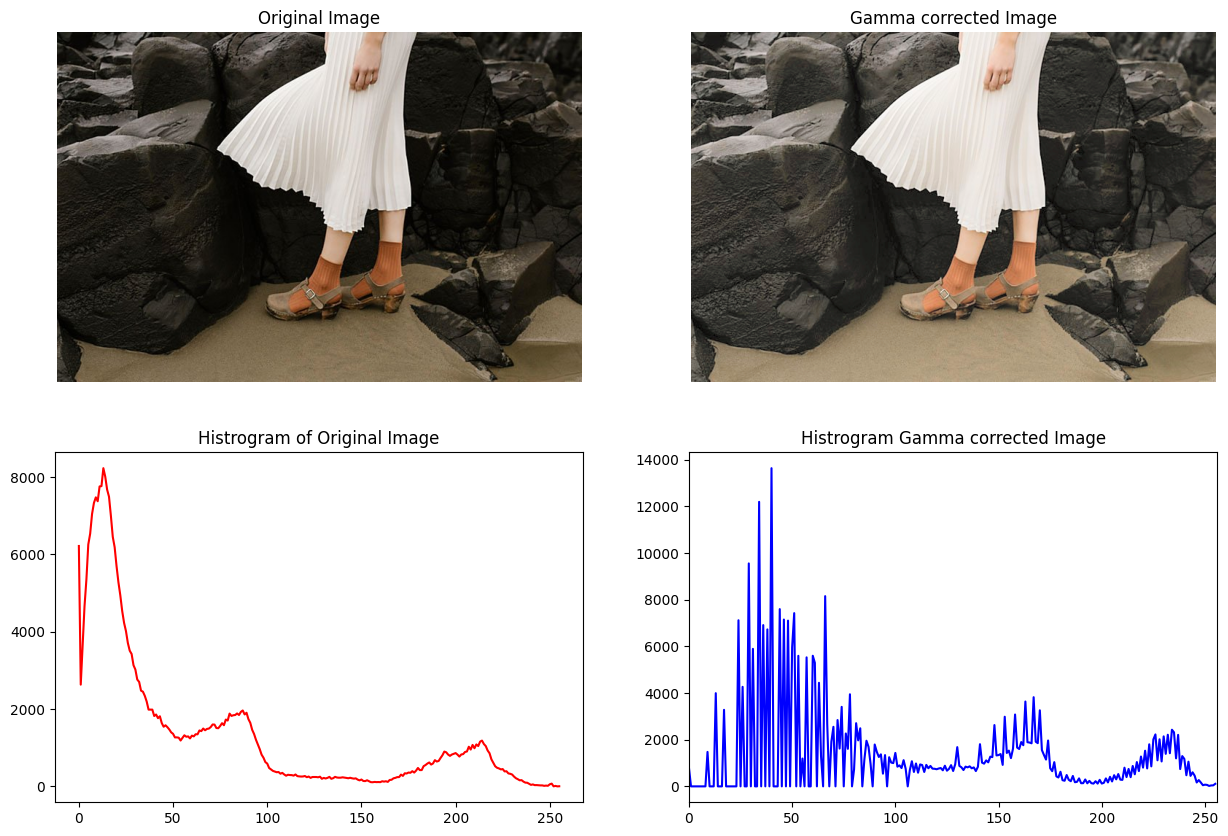

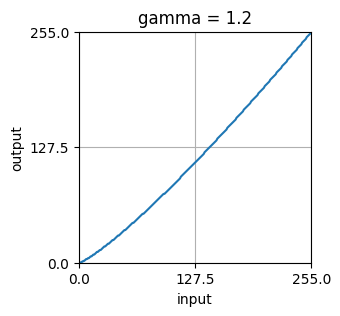

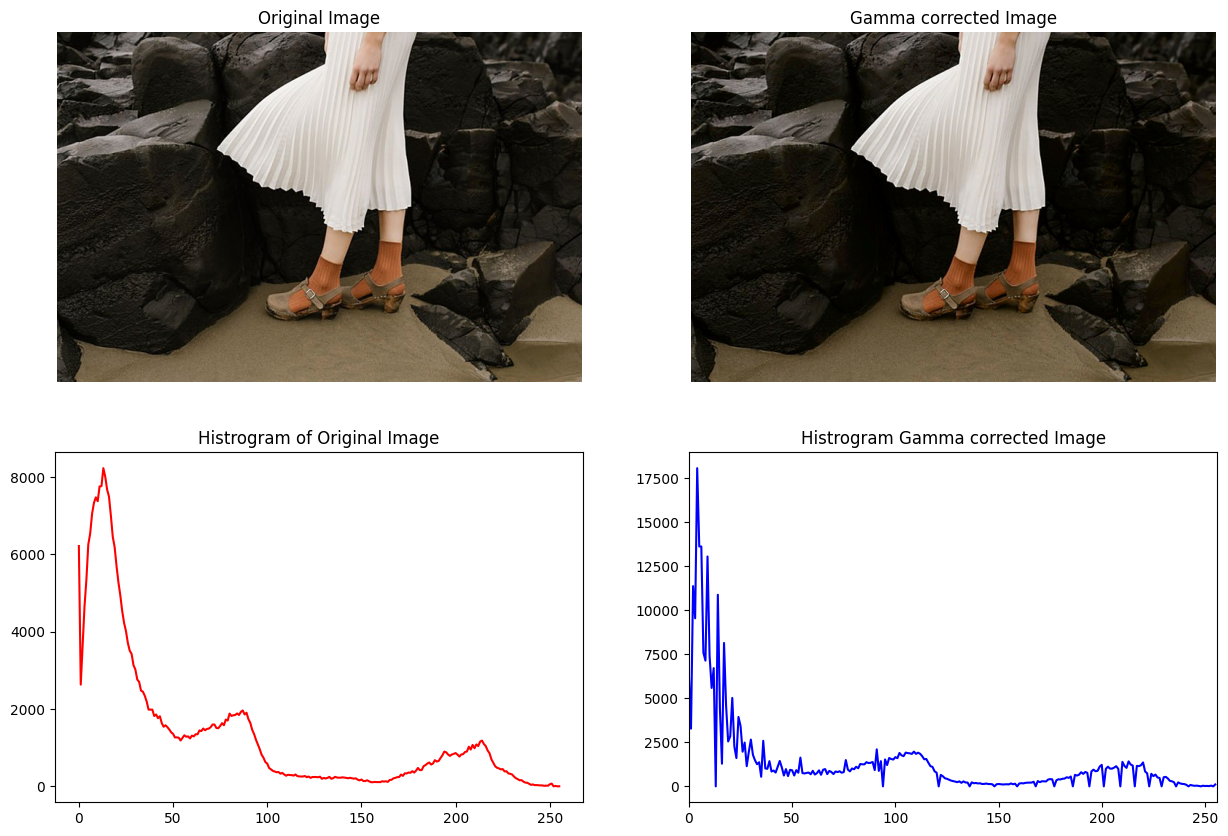

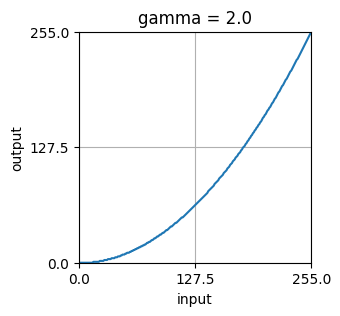

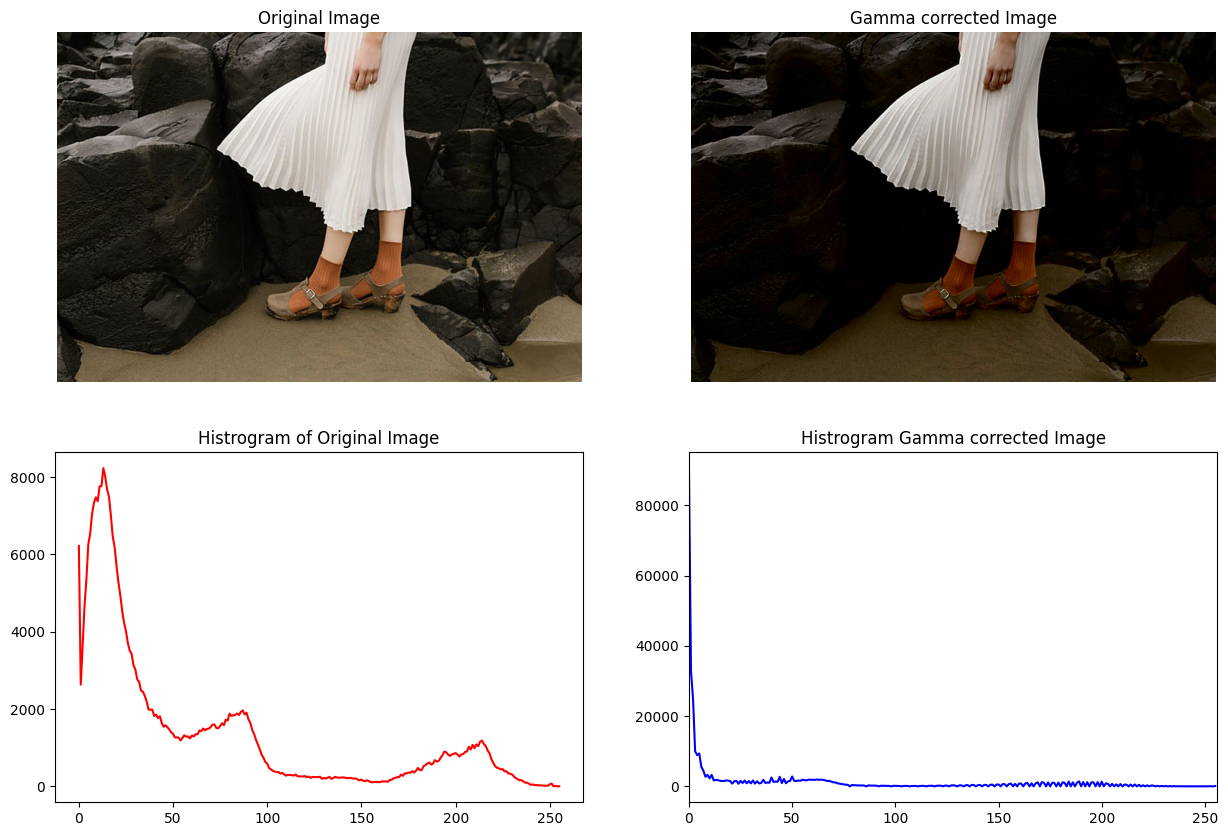

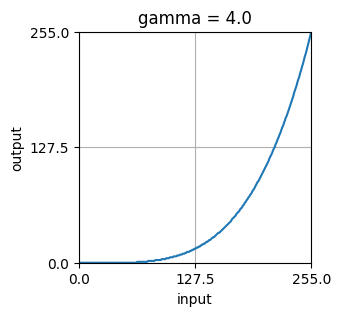

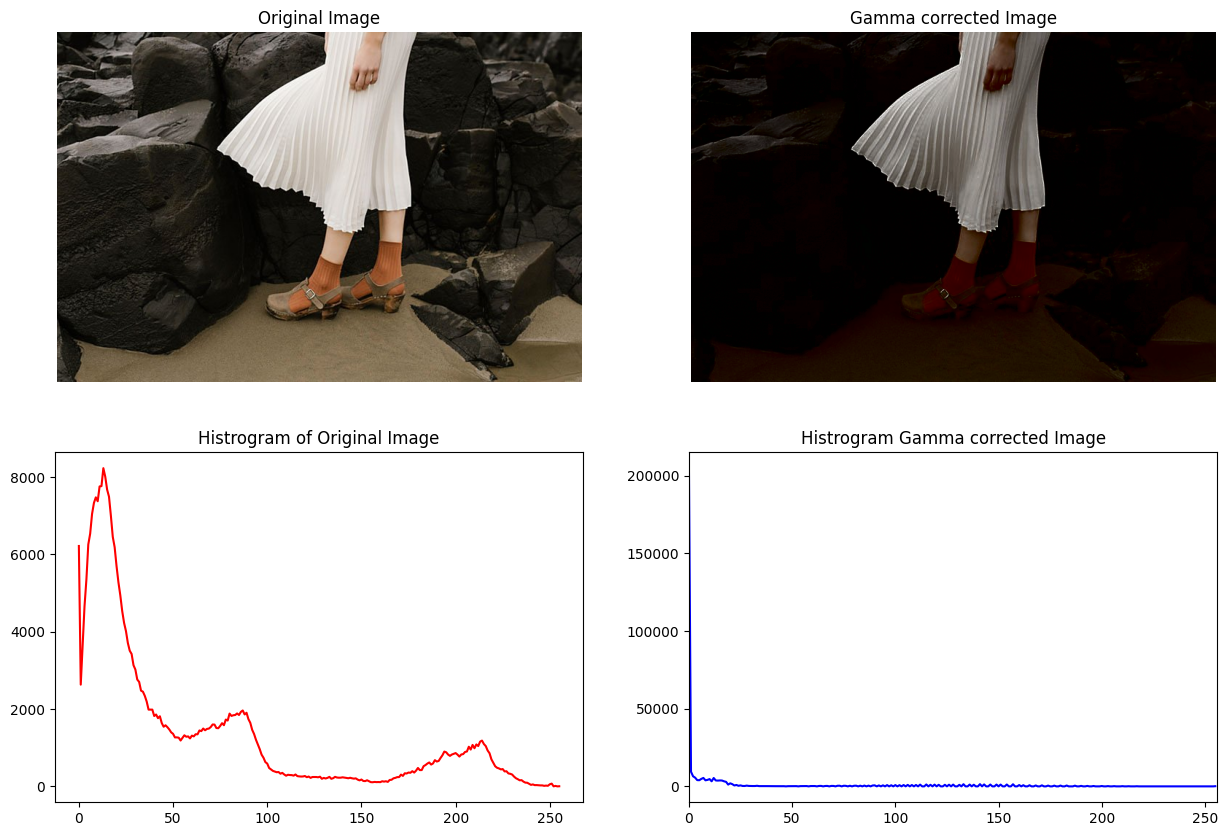

In [10]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'D:\VScode\JupyterWorks\highlights_and_shadows.jpg', cv.IMREAD_ANYCOLOR)
#cv.imshow('image',img)
#cv.waitKey(0)
#cv.destroyAllWindows()
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
#cv.imshow('image',lab)
#cv.waitKey(0)
#cv.destroyAllWindows()

l, a, b =cv.split(lab)

gamma = [0.2, 0.6, 1.2, 2.0, 4.0]

for i in gamma:
  t =  np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
  img_gm = cv.LUT(l,t)
  
  fig, ax = plt.subplots(figsize = (3,3))
  ax.set_title('gamma = %.1f' %i)
  ax.set_xlabel('input')
  ax.set_ylabel('output') 
  ax.set_xticks(np.linspace(0,255,3))
  ax.set_yticks(np.linspace(0,255,3))
  ax.grid(True)
  ax.set_xlim(0,255)
  ax.set_ylim(0,255)
  ax.plot(t)
  
  fig, ax = plt.subplots(2, 2, figsize = (15,10))
  
  ax[0,0].imshow(cv.cvtColor(img ,cv.COLOR_BGR2RGB))
  ax[0,0].set_title('Original Image')
  ax[0,0].axis('off')

  ax[0,1].imshow(cv.cvtColor(cv.merge([img_gm,a,b]),cv.COLOR_LAB2RGB))
  ax[0,1].set_title('Gamma corrected Image')
  ax[0,1].axis("off")
    
  histry_org = cv.calcHist([img],[0],None,[256],[0,256])
  ax[1,0].set_title('Histrogram of Original Image')
  ax[1,0].plot(histry_org,color = 'r')
  plt.xlim([0,256])
  
  histry_gm = cv.calcHist([img_gm],[0],None,[256],[0,256])  
  ax[1,1].set_title('Histrogram Gamma corrected Image')
  ax[1,1].plot(histry_gm,color = 'b')
  plt.xlim([0,256])
  
  plt.show()

## Question - 4

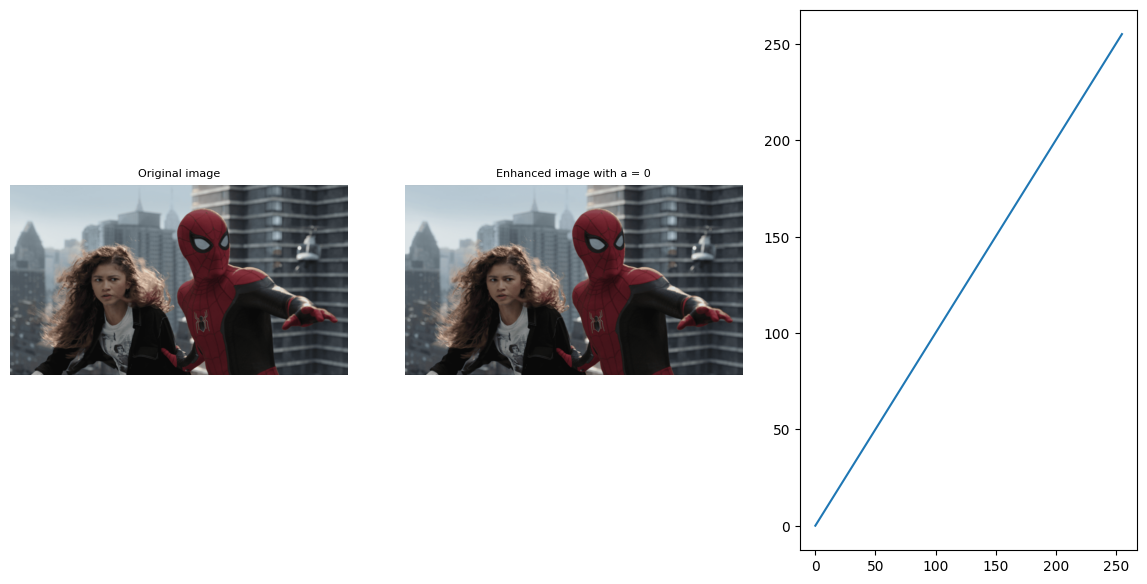

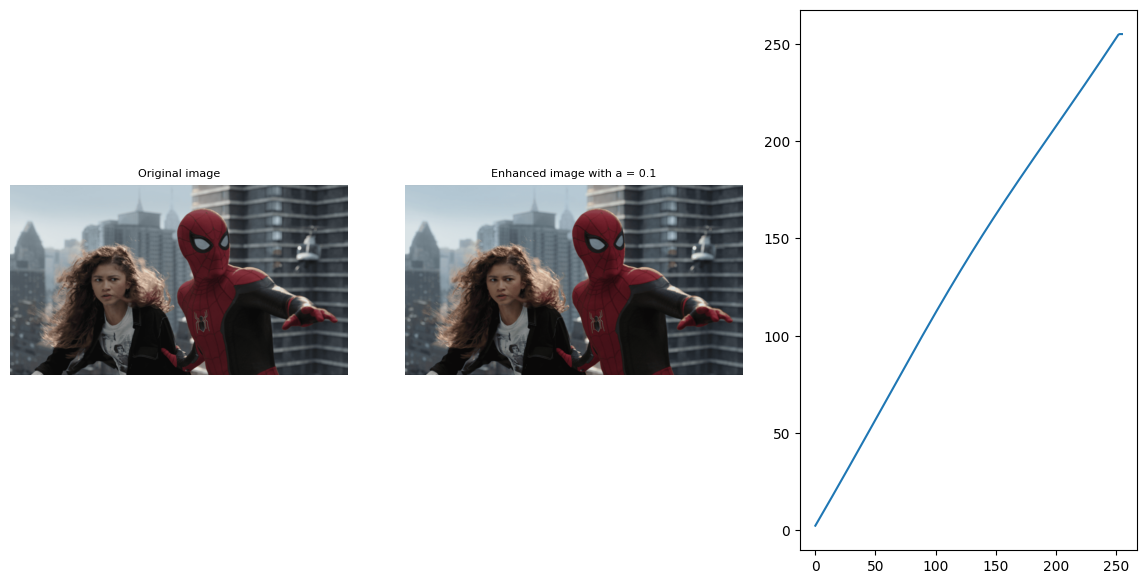

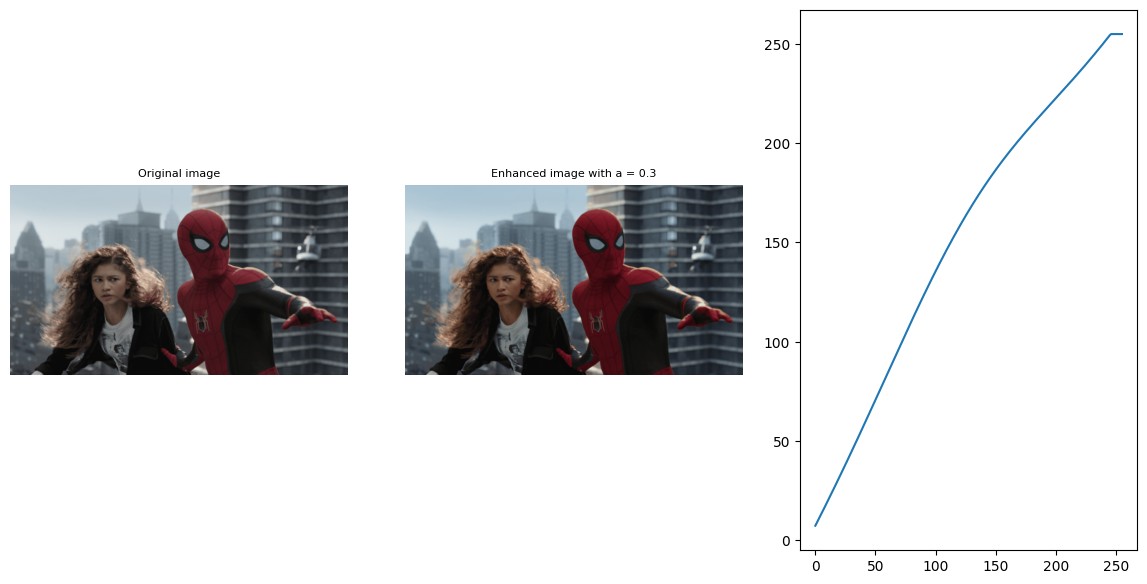

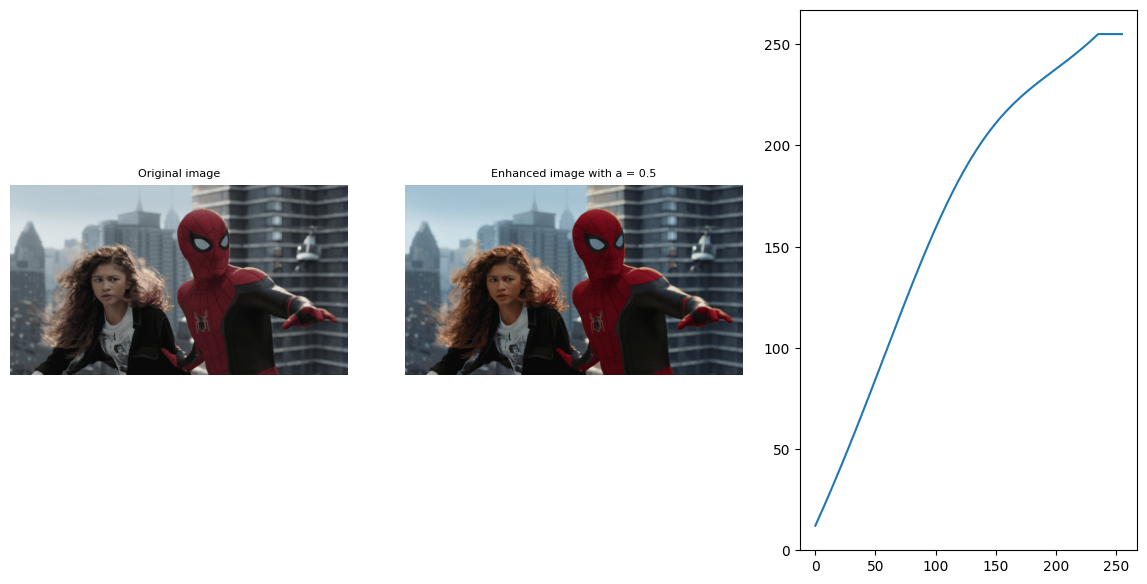

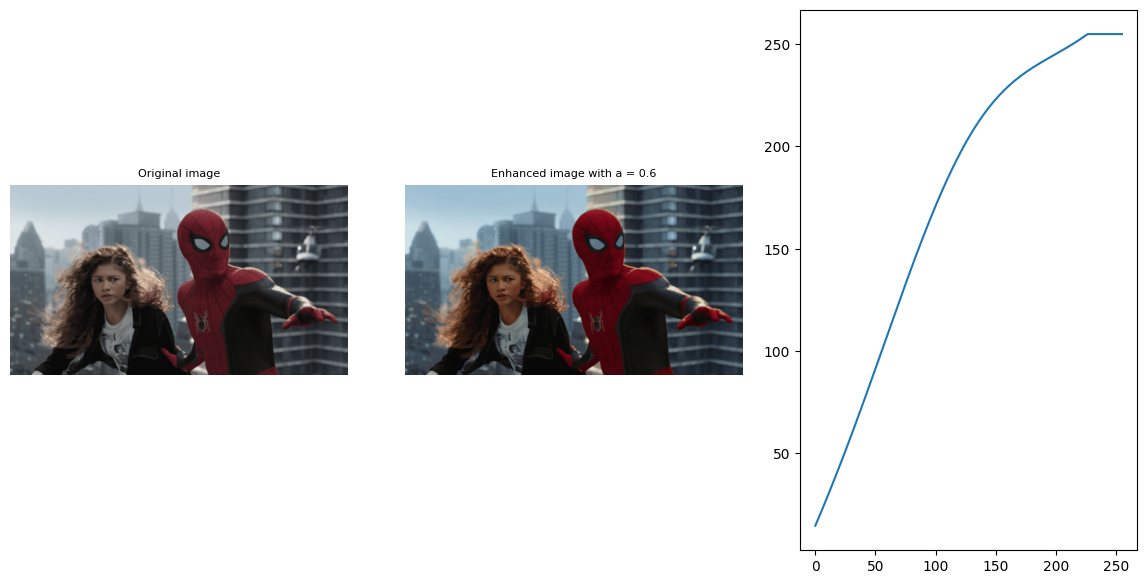

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

# Load the image
im = cv.imread(r'D:\VScode\JupyterWorks\spider.png', cv.IMREAD_COLOR)
assert im is not None
img_hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)


it = np.zeros(256, dtype=np.uint8)
ts = np.zeros_like(s)
ar = [0, 0.1, 0.3, 0.5, 0.6]

for a in ar:
    sigma = 70

    # Apply the transformation to the saturation plane
    for i in range(s.shape[0]):
        for j in range(s.shape[1]):
            x = s[i][j]
            result = x + (a * 128) * math.exp(-((x - 128) ** 2) / (2 * (sigma ** 2)))
            ts[i][j] = min(255, result)


    img_hsv_modified = cv.merge([h, ts, v])
    img_bgr_modified = cv.cvtColor(img_hsv_modified, cv.COLOR_HSV2BGR)

    f, ax = plt.subplots(1, 3, figsize=(12, 6))
    f.tight_layout()

    ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
    ax[0].set_title('Original image', fontsize=8)
    ax[0].axis('off')

    ax[1].imshow(cv.cvtColor(img_bgr_modified, cv.COLOR_BGR2RGB))
    ax[1].set_title('Enhanced image with a = ' + str(a), fontsize=8)
    ax[1].axis('off')

    x = np.arange(256)
    result = x + (a * 128) * np.exp(-((x - 128) ** 2) / (2 * (sigma ** 2)))
    it = np.minimum(255, result)
    ax[2].plot(x, it, label='a=' + str(a))

    plt.show()


## Question - 5


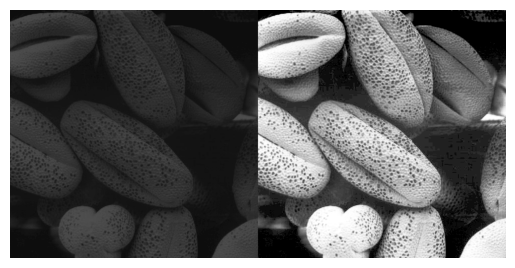

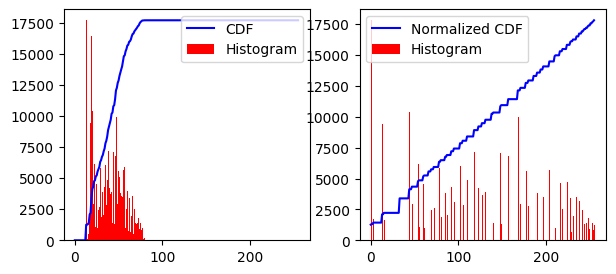

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

im = cv.imread(r'D:\VScode\JupyterWorks\shells.tif', cv.IMREAD_GRAYSCALE)
assert im is not None

hist, bins = np.histogram(im.ravel(), 256, [0, 256])
cdf = hist.cumsum()

# Normalize the CDF for display
cdf_norm = cdf * hist.max() / cdf.max()

res = np.hstack((im, equ))
plt.axis('off')
plt.imshow(res, cmap='gray')
plt.show()

fig, ax = plt.subplots(1, 2, figsize = (7,3))
ax[0].plot(cdf_norm, color='b')
ax[0].hist(im.flatten(), 256, [0, 256], color='r')
ax[0].legend(('CDF', 'Histogram'), loc='upper right')

# Apply histogram equalization using OpenCV
equ = cv.equalizeHist(im)
hist, bins = np.histogram(equ.ravel(), 256, [0, 256])

# Calculate the CDF of the equalized image
cdf_n = hist.cumsum()

# Normalize the CDF for display
cdf_normalized = cdf_n * hist.max() / cdf.max()

ax[1].plot(cdf_normalized, color='b')
ax[1].hist(equ.flatten(), 256, [0, 256], color='r')
ax[1].legend(('Normalized CDF', 'Histogram'), loc='upper left')

plt.show()



## Question - 6

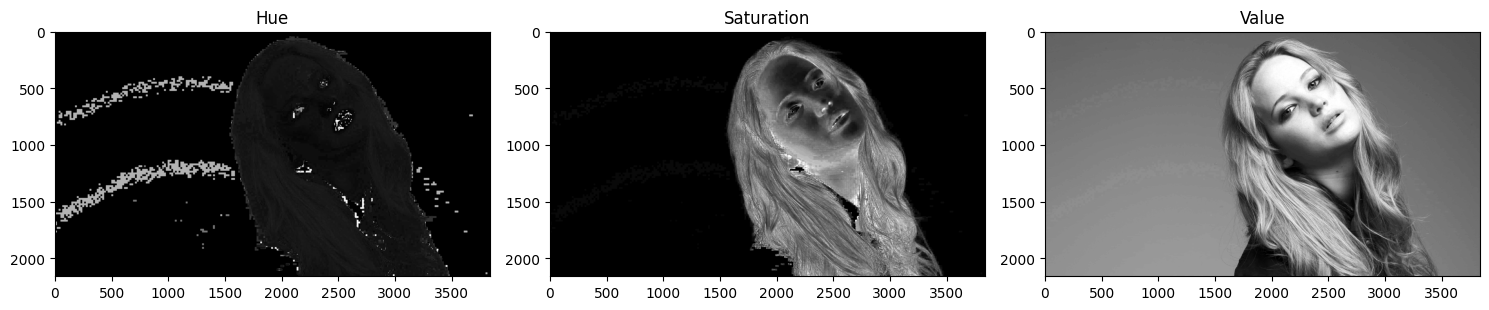

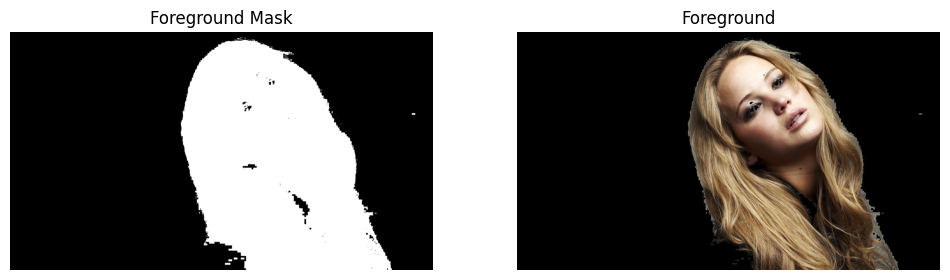

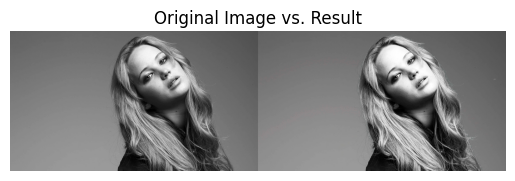

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
original_image = cv.imread(r'D:\VScode\JupyterWorks\jeniffer.jpg')
assert original_image is not None
hsv_image = cv.cvtColor(original_image, cv.COLOR_BGR2HSV)

hue, saturation, value = cv.split(hsv_image)

# Display hue, saturation, and value planes in grayscale
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(hue, cmap='gray')
plt.title('Hue')
plt.subplot(132), plt.imshow(saturation, cmap='gray') 
plt.title('Saturation')
plt.subplot(133), plt.imshow(value, cmap='gray') 
plt.title('Value')
plt.tight_layout()
plt.show()

# Threshold to create the foreground mask
threshold_value = 12  # Adjust as needed
_, foreground_mask = cv.threshold(saturation, threshold_value, 255, cv.THRESH_BINARY)

# Display the foreground mask
plt.figure(figsize=(12, 4))
plt.subplot(121), plt.imshow(foreground_mask, cmap='gray'), plt.title('Foreground Mask'), plt.axis('off')

# Extract the foreground region using cv2.bitwise_and
foreground = cv.bitwise_and(original_image, original_image, mask=foreground_mask)
plt.subplot(122), plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB)), plt.title('Foreground'), plt.axis('off')
plt.show()

# Compute the histogram of the foreground region
foreground_gray = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)
hist, bins = np.histogram(foreground_gray.ravel(), bins=256, range=[0, 255])

cumulative_histogram = hist.cumsum()

# Equalize the histogram of the foreground
equalized_foreground_gray = cv.equalizeHist(foreground_gray).astype(np.uint8)
equalized_foreground = cv.cvtColor(equalized_foreground_gray, cv.COLOR_GRAY2BGR)

background_mask = cv.bitwise_not(foreground_mask)

# Extract the background 
background = cv.bitwise_and(original_image, original_image, mask=background_mask)

# Combine the equalized foreground and background
result_image = cv.add(equalized_foreground, background)

original_gray_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)
original_rgb_image = cv.cvtColor(original_gray_image, cv.COLOR_GRAY2RGB)
output_image = np.hstack((original_rgb_image, result_image))
plt.axis('off')
plt.imshow(output_image, cmap='gray')
plt.title('Original Image vs. Result')
plt.show()


## Question - 7

### Part (a)

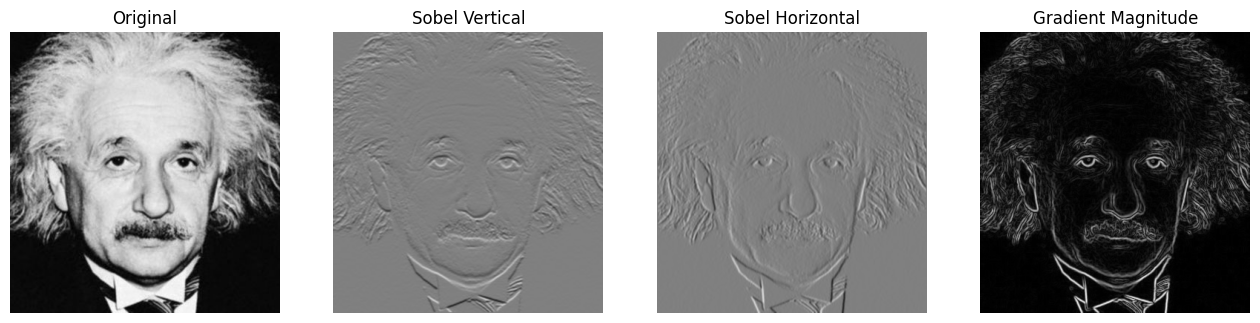

In [46]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

input_image = cv.imread(r"D:\VScode\JupyterWorks\einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert input_image is not None

# Define vertical and horizontal Sobel kernels
sobel_kernel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
sobel_kernel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

vertical_sobel_filtered = cv.filter2D(input_image, -1, sobel_kernel_v)
horizontal_sobel_filtered = cv.filter2D(input_image, -1, sobel_kernel_h)

# Compute the gradient magnitude using the filtered results
gradient_magnitude = np.sqrt(vertical_sobel_filtered**2 + horizontal_sobel_filtered**2)

fig, ax = plt.subplots(1, 4, figsize=(16, 16))
ax[0].imshow(input_image, cmap='gray', vmin=0, vmax=255), ax[0].set_title("Original"), ax[0].axis('off')
ax[1].imshow(vertical_sobel_filtered, cmap='gray', vmin=-1020, vmax=1020), ax[1].set_title("Sobel Vertical"), ax[1].axis('off')
ax[2].imshow(horizontal_sobel_filtered, cmap='gray', vmin=-1020, vmax=1020), ax[2].set_title("Sobel Horizontal"), ax[2].axis('off')
ax[3].imshow(gradient_magnitude, cmap='gray'), ax[3].set_title("Gradient Magnitude"), ax[3].axis('off')

plt.show()



## Question - 9


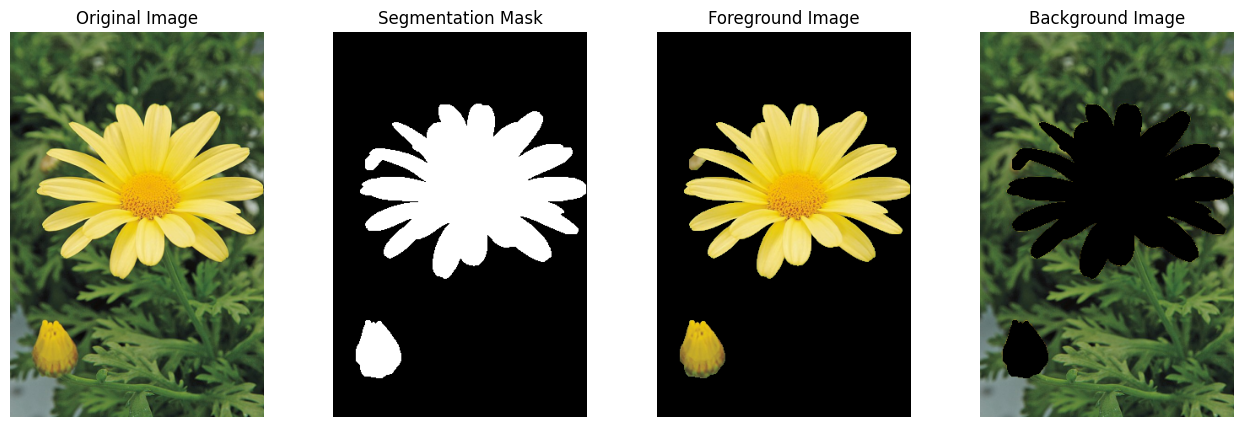

In [64]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

input_image = cv.imread(r"D:\VScode\JupyterWorks\flower.png", cv.IMREAD_COLOR)
original_image = input_image.copy()

# Create an empty mask of the same size as the image
segmentation_mask = np.zeros(input_image.shape[:2], np.uint8)
region_of_interest = (10, 70, 550, 530)  # Format: (x, y, width, height)

# Initialize arrays for GrabCut's foreground and background models
foreground_model = np.zeros((1, 65), np.float64)
background_model = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm to segment the image
cv.grabCut(input_image, segmentation_mask, region_of_interest, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)

# Create a binary segmentation mask based on GrabCut's output
foreground_mask = np.where((segmentation_mask == 0) | (segmentation_mask == 2), 0, 1).astype("uint8")
foreground_image = input_image * foreground_mask[:, :, np.newaxis]
background_mask = np.where((segmentation_mask == 1) | (segmentation_mask == 3), 0, 1).astype("uint8")
background_image = input_image * background_mask[:, :, np.newaxis]

# Display the original image, segmentation mask, foreground image, and background image
fig, ax = plt.subplots(1, 4, figsize=(16, 5))
ax[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB)), ax[0].set_title("Original Image"), ax[0].axis("off")
ax[1].imshow(foreground_mask, cmap="gray"), ax[1].set_title("Segmentation Mask"), ax[1].axis("off")
ax[2].imshow(cv.cvtColor(foreground_image, cv.COLOR_BGR2RGB)), ax[2].set_title("Foreground Image"), ax[2].axis("off")
ax[3].imshow(cv.cvtColor(background_image, cv.COLOR_BGR2RGB)), ax[3].set_title("Background Image"), ax[3].axis("off")
plt.show()


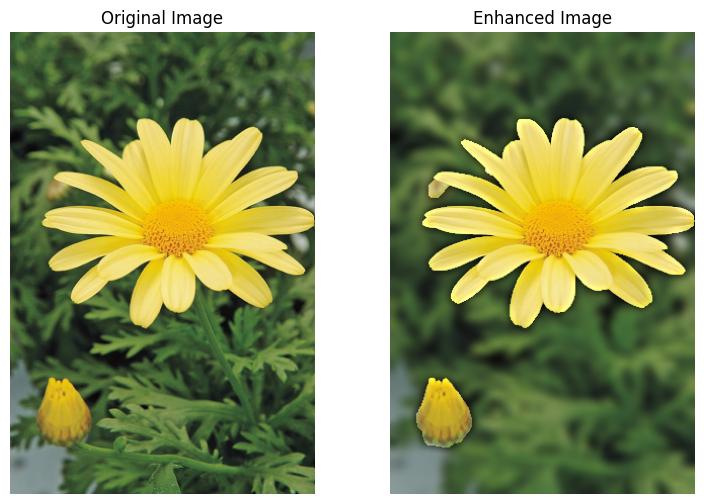

In [66]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
input_image = cv.imread(r"D:\VScode\JupyterWorks\flower.png", cv.IMREAD_COLOR)
original_image = input_image.copy()

# Create an empty mask of the same size as the image
segmentation_mask = np.zeros(input_image.shape[:2], np.uint8)
region_of_interest = (10, 70, 550, 530)  # Format: (x, y, width, height)

# Initialize arrays for GrabCut's foreground and background models
foreground_model = np.zeros((1, 65), np.float64)
background_model = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm to segment the image
cv.grabCut(input_image, segmentation_mask, region_of_interest, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)

# Create a binary segmentation mask based on GrabCut's output
foreground_mask = np.where((segmentation_mask == 0) | (segmentation_mask == 2), 0, 1).astype("uint8")
foreground_image = input_image * foreground_mask[:, :, np.newaxis]
background_mask = np.where((segmentation_mask == 1) | (segmentation_mask == 3), 0, 1).astype("uint8")
background_image = input_image * background_mask[:, :, np.newaxis]

# Apply Gaussian blur to the background image
blurred_background = cv.GaussianBlur(background_image, (15, 15), 5)

# Add the blurred background image and the foreground image to enhance the image
enhanced_image = cv.add(blurred_background, foreground_image)

# Display the original image and the enhanced image
fig, ax = plt.subplots(1, 2, figsize=(9, 6))
ax[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB)), ax[0].set_title("Original Image"), ax[0].axis("off")
ax[1].imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB)), ax[1].set_title("Enhanced Image"), ax[1].axis("off")
plt.show()
